Scrape put, call weekly ratio vs. stock price (not profitable to date)

Barchart:

https://www.barchart.com/stocks/quotes/AMD/put-call-ratios

Graphs:

https://www.optionistics.com/put-call-ratio/IBKR

In [54]:
import pandas as pd
import time 
from bs4 import BeautifulSoup
import datetime
import requests
import psycopg2
pg_host_dic = {
    "database":"us",
    "user":"postgres",
    # "password":"",
    "host":"localhost",
    "port":5432
}
password = "dearsno20240105"

def get_put_call_information(code = "AMD"):
    barurl = "https://www.barchart.com/stocks/quotes/" + code + "/put-call-ratios"
    headers = {'User-Agent': 'Mozilla/5.0'}
    html = requests.get(barurl, headers=headers)
    soup = BeautifulSoup(html.text, "lxml")
    a = soup.find_all("div", {'class':"bc-futures-options-quotes-totals__data-row"})
def insert_put_call_information(code = "AMD"):
    s = get_put_call_information(code="AMD")
close = True

conn = psycopg2.connect(**pg_host_dic)
conn.autocommit = True
cur = conn.cursor()
sql_string = f""""""
cur.execute(sql_string)
if close:
    cur.close()
    conn.close()


[<div class="bc-futures-options-quotes-totals__data-row"> Put Volume Total <strong class="right"> 217,965 </strong> </div>,
 <div class="bc-futures-options-quotes-totals__data-row"> Call Volume Total <strong class="right"> 382,625 </strong> </div>,
 <div class="bc-futures-options-quotes-totals__data-row"> Put/Call Volume Ratio <strong class="right"> 0.57 </strong> </div>,
 <div class="bc-futures-options-quotes-totals__data-row"> Put Open Interest Total <strong class="right"> 1,478,260 </strong> </div>,
 <div class="bc-futures-options-quotes-totals__data-row"> Call Open Interest Total <strong class="right"> 1,392,487 </strong> </div>,
 <div class="bc-futures-options-quotes-totals__data-row"> Put/Call Open Interest Ratio <strong class="right"> 1.06 </strong> </div>]

In [47]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
code = "AMD"
headers = {'User-Agent': 'Mozilla/5.0'}
barurl = "https://www.barchart.com/stocks/quotes/" + code + "/put-call-ratios"
barurl = "https://www.barchart.com/stocks/quotes/AMD/put-call-ratios"
res = requests.post(barurl, headers=headers)
soup = BeautifulSoup(res.text, "lxml")
# a = soup.find_all("div", {"class": "_cell _align_right daysToExpiration"})
soup

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<base href="/"/>
<title>Page not found</title>
<meta content="Barchart.com Inc. is the leading provider of real-time or delayed intraday stock and commodities charts and quotes. Keep tabs on your portfolio, search for stocks, commodities, or mutual funds with screeners, customizable chart indicators and technical analysis." name="description"/>
<meta content="stocks,mutual funds,personal finance,stock charting,money management,novice trader,realtime quotes,realtime charts,stock research,indices,market timing,futures,commodities,investment timing,forex,quotes,stock market screening,charts,intraday,charting,historical,financial,graph,search,market,data,technical,analysis,indicators,foreign exchange markets,trading tools,E-Mini Nasdaq,E-Mini S&amp;amp;P,S&amp;amp;P 500,

https://www.finlab.tw/%E5%88%A9%E7%94%A8Pandas%E8%BC%95%E9%AC%86%E5%8F%96%E5%BE%97%E6%AD%B7%E5%8F%B2%E8%82%A1%E5%83%B9/

[*********************100%%**********************]  1 of 1 completed

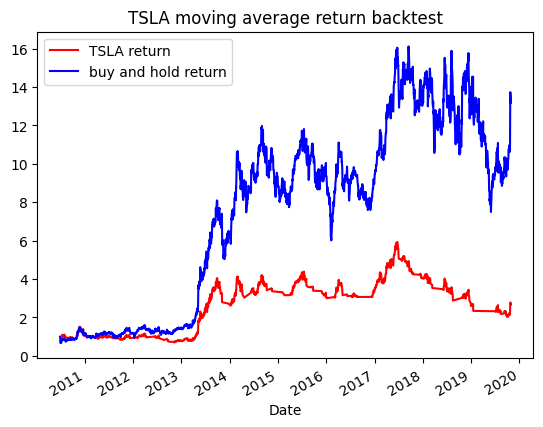

In [38]:
import matplotlib.pyplot as plt     # pp install matplotlib
import pandas as pd                 # pip install pandas
import yfinance as yf
%matplotlib inline
code = "TSLA"
c = yf.download(code, start="2010-01-01", end="2019-10-31", progress=False)['Close']
# 近60日收盤
c60 = c.rolling(60, min_periods=1).mean()

# 畫圖
# c['2015':].plot()
# c60['2015':].plot()

# 進60日收盤
c60 = c.rolling(60, min_periods=1).mean()

# 買入訊號
signal = (c > c60)

# 回測並跟大盤比較
(c.shift(-1) / c)[signal].cumprod().plot(color='red', label=code + " return")
(c.shift(-1) / c).cumprod().plot(color='blue', label="buy and hold return")
plt.title(code + " moving average return backtest")
plt.legend()


In [ ]:
import requests
from io import StringIO
import pandas as pd
import numpy as np

datestr = '20180131'

# 下載股價
r = requests.post('https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + datestr + '&type=ALL')

# 整理資料，變成表格
df = pd.read_csv(StringIO(r.text.replace("=", "")), 
            header=["證券代號" in l for l in r.text.split("\n")].index(True)-1)

# 整理一些字串：
df = df.apply(lambda s: pd.to_numeric(s.astype(str).str.replace(",", "").replace("+", "1").replace("-", "-1"), errors='coerce'))

# 顯示出來
# df.head()
# df[pd.to_numeric(df['本益比'], errors='coerce') < 15]

In [ ]:
import datetime
import time

import requests
from io import StringIO
import pandas as pd
import numpy as np

def crawl_price(date):
    r = requests.post('http://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + str(date).split(' ')[0].replace('-','') + '&type=ALL')
    ret = pd.read_csv(StringIO("\n".join([i.translate({ord(c): None for c in ' '}) 
                                        for i in r.text.split('\n') 
                                        if len(i.split('",')) == 17 and i[0] != '='])), header=0)
    ret = ret.set_index('證券代號')
    ret['成交金額'] = ret['成交金額'].str.replace(',','')
    ret['成交股數'] = ret['成交股數'].str.replace(',','')
    return ret

data = {}
n_days = 9
date = datetime.datetime.now()
fail_count = 0
allow_continuous_fail_count = 5
while len(data) < n_days:

    print('parsing', date)
    # 使用 crawPrice 爬資料
    try:
        # 抓資料
        data[date.date()] = crawl_price(date)
        print('success!')
        fail_count = 0
    except:
        # 假日爬不到
        print('fail! check the date is holiday')
        fail_count += 1
        if fail_count == allow_continuous_fail_count:
            raise
            break
    
    # 減一天
    date -= datetime.timedelta(days=1)
    time.sleep(10)
# df = pd.DataFrame(data)
list(data.values())[0].head()